In [1]:

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

### Preparación de un qubit en una superposición de estados 

Definimos el cúbit como un sistema con dos estados de energía base, uno de los cuales es el estado base (0) y el otro es el estado excitado (1), como se ilustra en la Figura. El nombre del valor de estado de cada estado base podría ser cualquiera que elijamos, pero dado que los resultados de nuestro circuito serán interpretados por un sistema clásico, utilizaremos valores binarios para definir nuestros estados, en este caso, los valores binarios 0 y 1. Decir que la superposición de dos estados "está en 0 y 1 al mismo tiempo" es incorrecto. La forma correcta de describir un cúbit en un estado de superposición es decir que está "en una combinación lineal compleja de estados, donde en este caso, los estados son 0 y 1".

![Esfera](Class_01/Figures/bloch_01.png "Figura: Esfera de Bloch" )


La siguiente captura de pantalla se refiere a una **esfera de Bloch**, que representa un cúbit único y sus dos estados base, que están ubicados en polos opuestos. En el polo norte, tenemos el estado base 0, mientras que en el polo sur, tenemos el estado base 1. Los símbolos que rodean los valores de los estados base son las notaciones comúnmente utilizadas en la mayoría de los textos sobre computación cuántica. Esto se llama **notación de Dirac**, que fue nombrada en honor al físico teórico inglés Paul Dirac, quien concibió esta notación, a la que llamó notación **Bra-Ket**. Tanto la notación Bra-Ket como la notación de Dirac se utilizan de manera intercambiable, ya que se refieren al mismo concepto, como veremos más adelante.

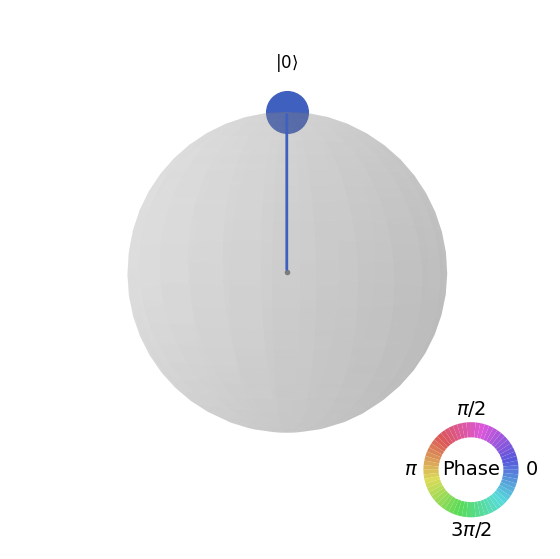

In [2]:
qc = QuantumCircuit(1)

state = Statevector(qc)
plot_state_qsphere(state)

Cada qubit como se mencionó anteriormente 